<h1><center> NeuroML-DB Analysis - Electrophysiology Mechanisms </center></h1>

<u>Objectives:</u>
1. Demonstrate a relationship between channel presence and a particular channel type. Here A-type and M-type currents are used as example.
2. Plot presence on top of previous ephys clustering.

In [587]:
import os
from os.path import join
import pandas as pd
import numpy as np
import requests
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline



In [613]:
# input paths
cwd = os.getcwd()
path2data = join(cwd,'data')
path2figs = join(cwd,'figures')

print(path2data)
print(path2figs)


/Users/vrhaynes/Desktop/research/data_analysis/meta/LargeScaleModelAnalysis_2019/data
/Users/vrhaynes/Desktop/research/data_analysis/meta/LargeScaleModelAnalysis_2019/figures


In [70]:
# load dataframes
filename = 'all_soma_cond_dens.csv'
f = os.path.join(path2data,filename)
all_soma_conductance_density_df = pd.read_csv(f,index_col=0)

filename = 'channel_tags.csv'
f = os.path.join(path2data,filename)
channel_tags_df = pd.read_csv(f,index_col=0)

filename = 'cortical_tags.csv'
f = os.path.join(path2data,filename)
cortical_tags_df = pd.read_csv(f,index_col=0)


In [34]:
# these need to be mapped to a standard space
all_channel_types = all_soma_conductance_density_df.columns.values[2:].tolist() # skip 'nmdb_id' and 'cell_id'

print(all_channel_types)

['GolgiPassiveCond', 'Golgi_H_CML', 'Golgi_KA', 'Golgi_KAHP', 'Golgi_KA_CML', 'Golgi_KC', 'Golgi_KCa_CML', 'Golgi_KDr_CML', 'Golgi_KV', 'Golgi_Kslow', 'Golgi_NaF_CML', 'Golgi_NaP', 'Golgi_NaR', 'Golgi_NaT', 'Golgi_hcn1f', 'Golgi_hcn1s', 'Golgi_hcn2f', 'Golgi_hcn2s', 'GranPassiveCond', 'Gran_CaHVA_98', 'Gran_H_98', 'Gran_KA_98', 'Gran_KCa_98', 'Gran_KDr_98', 'Gran_NaF_98', 'HCN', 'HCNolm', 'HCNsomap', 'H_STG', 'IL', 'IM', 'Ih', 'Im', 'Im_v2', 'KA_STG', 'KCaS', 'KCa_STG', 'K_P', 'K_Pst', 'K_T', 'K_Tst', 'Kd', 'KdShu2007', 'Kd_STG', 'Kdrfast', 'Kdrfastngf', 'Kdrp', 'Kv2like', 'Kv3_1', 'KvA', 'KvAngf', 'KvAolm', 'KvAproxp', 'KvCaB', 'KvGroup', 'Leak', 'LeakCond', 'LeakConductance', 'MFFastLeakCond', 'Na', 'NaTa_t', 'NaTs', 'NaTs2_t', 'NaV', 'Na_STG', 'Nap', 'Nap_Et2', 'Nav', 'Navaxonp', 'Navbis', 'Navcck', 'Navngf', 'Navp', 'SK', 'SK_E2', 'SKv3_1', 'StochKv_deterministic', 'ar__m00', 'ar__m00_25', 'ca', 'ca_boyle', 'cal', 'cat', 'cat_a', 'hd__vhalflmin73', 'it', 'k2', 'kChan', 'k_fast', 'k

In [35]:
channel_tags_df.tail()

,Model_ID,Model_Name,Filename
178,NMLCH001638,IA A-Type Potassium,KvAproxp.channel.nml
179,NMLCH001639,KCa AHP Type Calcium Dependent Potassium,KvCaB.channel.nml
180,NMLCH001641,Na Sodium,Navbis.channel.nml
181,NMLCH001645,Na Sodium,Navapicalp.channel.nml
182,NMLCH001649,Ih Hyperpolarization Activated Cation (HCN),HCNsomap.channel.nml


In [71]:
cortical_tags_df.tail()

,Model_ID,Model_Name,Filename
1217,NMLCL001650,CT,CT
1218,NMLCL001657,SOM,SOM
1219,NMLCL001660,PT,PT
1220,NMLCL001663,IT,IT
1221,NMLCL001664,PV,PV


In [72]:
all_soma_conductance_density_df.head()

,cell_id,CavN,GolgiPassiveCond,Golgi_H_CML,Golgi_KA,Golgi_KAHP,Golgi_KA_CML,Golgi_KC,Golgi_KCa_CML,Golgi_KDr_CML,...,nap,napf__a0__b0__c0__d0__fastNa_shift0,napf_spinstell__a0__b0__c0__d0__shmin2_5,napf_tcr__a0__b0__c0__d0__fastNa_shift7,nax,nax__sh0,nax__sh10,nax__sh15,pas,passiveChan
0,AB_PD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.000000,0.0
1,CA1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.035714,0.0
2,Cell_329321704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.125114,0.0
3,Cell_329322394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.620030,0.0
4,Cell_471081668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0.000945,0.0


In [64]:
all_soma_conductance_density_df['cell_id'].values.tolist()

['AB_PD',
 'CA1',
 'Cell_329321704',
 'Cell_329322394',
 'Cell_471081668',
 'Cell_471085845',
 'Cell_471086533',
 'Cell_471087975',
 'Cell_472299294',
 'Cell_472299363',
 'Cell_472300877',
 'Cell_472304676',
 'Cell_472306460',
 'Cell_472306544',
 'Cell_472306616',
 'Cell_472352327',
 'Cell_472363762',
 'Cell_472421285',
 'Cell_472430904',
 'Cell_472434498',
 'Cell_472440759',
 'Cell_472442377',
 'Cell_472447460',
 'Cell_472450023',
 'Cell_472451419',
 'Cell_472455509',
 'Cell_472912107',
 'Cell_472912177',
 'Cell_473465456',
 'Cell_473465774',
 'Cell_473834758',
 'Cell_473835796',
 'Cell_473862421',
 'Cell_473862496',
 'Cell_473862845',
 'Cell_473863035',
 'Cell_473863510',
 'Cell_473863578',
 'Cell_473871592',
 'Cell_473871773',
 'Cell_473872986',
 'Cell_476637699',
 'Cell_477494382',
 'Cell_477840124',
 'Cell_477876583',
 'Cell_478043748',
 'Cell_478045347',
 'Cell_478047737',
 'Cell_478047816',
 'Cell_478513187',
 'Cell_478513224',
 'Cell_478513396',
 'Cell_478513398',
 'Cell_478513

## Clean soma conductance density dataframe

Not sure why I thought "cell_id" without the model id was useful.

In [95]:
reduced_model_ids = []
reduced_model_names = []

cond_df = all_soma_conductance_density_df.copy()

for cortical_id, cortical_name in zip(cortical_tags_df['Model_ID'].values,cortical_tags_df['Filename'].values):
    
    this_cond_df = cond_df[cond_df['cell_id']==cortical_name]
    
    j = this_cond_df.index.values
    
    if len(j) == 0:
        print(cortical_name,cortical_id,'Not Found')
    else:
        reduced_model_ids.append(cortical_id)
        reduced_model_names.append(cortical_name)

        
        

GLIF_486557295 NMLCL001428 Not Found
GLIF_480629475 NMLCL001455 Not Found
GLIF_472308324 NMLCL001472 Not Found
GLIF_472451425 NMLCL001485 Not Found
GLIF_472455459 NMLCL001491 Not Found
GLIF_480629471 NMLCL001505 Not Found
GLIF_480633674 NMLCL001509 Not Found
GLIF_473875489 NMLCL001540 Not Found
CT NMLCL001650 Not Found
SOM NMLCL001657 Not Found
PT NMLCL001660 Not Found
IT NMLCL001663 Not Found
PV NMLCL001664 Not Found


#### !-- TODO: Looks like I missed the Dura-Bernal models originally. I will have to go back and fix that.

In [96]:
temp_df = cond_df[cond_df['cell_id'].isin(reduced_model_names)]


In [97]:
temp_df = temp_df.rename(index=str, columns={"cell_id": "Filename"})

In [98]:
len(reduced_model_ids)

1143

In [100]:
temp_df['Model_ID'] = reduced_model_ids

In [102]:
cond_df = temp_df.copy()

In [103]:
cond_df.head()

,Filename,CavN,GolgiPassiveCond,Golgi_H_CML,Golgi_KA,Golgi_KAHP,Golgi_KA_CML,Golgi_KC,Golgi_KCa_CML,Golgi_KDr_CML,...,napf__a0__b0__c0__d0__fastNa_shift0,napf_spinstell__a0__b0__c0__d0__shmin2_5,napf_tcr__a0__b0__c0__d0__fastNa_shift7,nax,nax__sh0,nax__sh10,nax__sh15,pas,passiveChan,Model_ID
2,Cell_329321704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.125114,0.0,NMLCL000073
3,Cell_329322394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.620030,0.0,NMLCL000087
4,Cell_471081668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.000945,0.0,NMLCL000088
5,Cell_471085845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.064199,0.0,NMLCL000089
6,Cell_471086533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0,0.0,0.002628,0.0,NMLCL000090


In [107]:
cond_df.columns.tolist()

['Filename',
 'CavN',
 'GolgiPassiveCond',
 'Golgi_H_CML',
 'Golgi_KA',
 'Golgi_KAHP',
 'Golgi_KA_CML',
 'Golgi_KC',
 'Golgi_KCa_CML',
 'Golgi_KDr_CML',
 'Golgi_KV',
 'Golgi_Kslow',
 'Golgi_NaF_CML',
 'Golgi_NaP',
 'Golgi_NaR',
 'Golgi_NaT',
 'Golgi_hcn1f',
 'Golgi_hcn1s',
 'Golgi_hcn2f',
 'Golgi_hcn2s',
 'GranPassiveCond',
 'Gran_CaHVA_98',
 'Gran_H_98',
 'Gran_KA_98',
 'Gran_KCa_98',
 'Gran_KDr_98',
 'Gran_NaF_98',
 'HCN',
 'HCNolm',
 'HCNsomap',
 'H_STG',
 'IL',
 'IM',
 'Ih',
 'Im',
 'Im_v2',
 'KA_STG',
 'KCaS',
 'KCa_STG',
 'K_P',
 'K_Pst',
 'K_T',
 'K_Tst',
 'Kd',
 'KdShu2007',
 'Kd_STG',
 'Kdrfast',
 'Kdrfastngf',
 'Kdrp',
 'Kv2like',
 'Kv3_1',
 'KvA',
 'KvAngf',
 'KvAolm',
 'KvAproxp',
 'KvCaB',
 'KvGroup',
 'Leak',
 'LeakCond',
 'LeakConductance',
 'MFFastLeakCond',
 'Na',
 'NaTa_t',
 'NaTs',
 'NaTs2_t',
 'NaV',
 'Na_STG',
 'Nap',
 'Nap_Et2',
 'Nav',
 'Navaxonp',
 'Navbis',
 'Navcck',
 'Navngf',
 'Navp',
 'SK',
 'SK_E2',
 'SKv3_1',
 'StochKv_deterministic',
 'ar__m00',
 'ar__m0

In [134]:
def compute_scale_conductance_dataframe(conductance_density_df):
    maximums = []
    
    scaled_df = conductance_density_df.copy()
    
    unique_channels = conductance_density_df.columns.values[1:-1] # skip column == 'cell_id'

    for channel in unique_channels:

        maximums.append(np.max(conductance_density_df[channel].values))
        if np.max(conductance_density_df[channel].values)>0:

            scaled_df[channel] = np.divide(conductance_density_df[channel].values,np.max(conductance_density_df[channel].values))
            
    return scaled_df

In [135]:
scaled_cond_df = compute_scale_conductance_dataframe(cond_df)

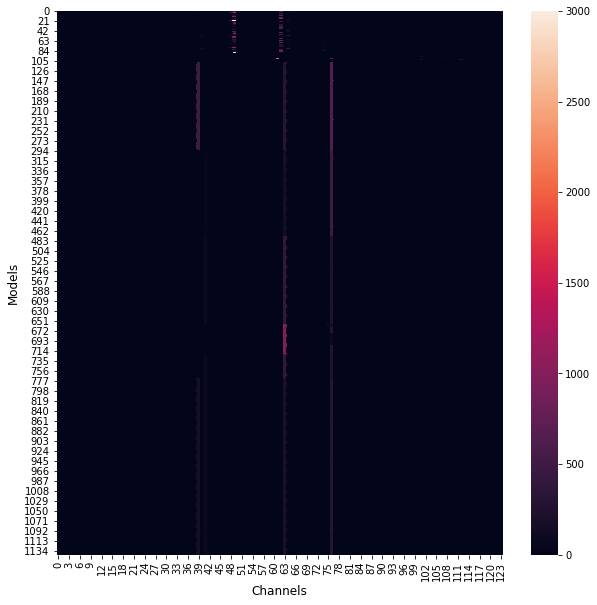

In [136]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax = sns.heatmap(cond_df[cond_df.columns[1:-1]].values)
ax.set_xlabel('Channels',size='large')
ax.set_ylabel('Models',size='large');

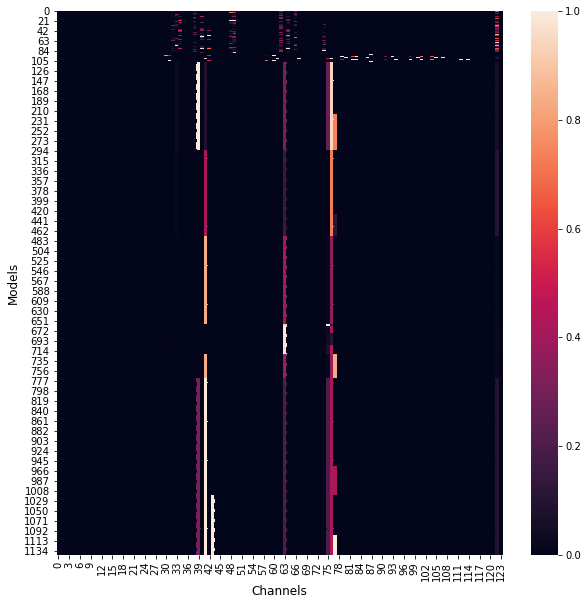

In [137]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax = sns.heatmap(scaled_cond_df[scaled_cond_df.columns[1:-1]].values)
ax.set_xlabel('Channels',size='large')
ax.set_ylabel('Models',size='large');

# Slow Inactivating Potassium channels (including A-type channels)

In [561]:
desired_channel_types = ['A-Type', 'A Type','IA','Slow Inact']


channel_type = 'Slow Inactivating Potassium'
desired_channel_ids = []

for i, model_name in enumerate(channel_tags_df['Model_Name'].values):
    
    condition_met = False
    for chan_type in desired_channel_types:
        if chan_type in model_name:
            condition_met = True
            
    if condition_met:    
        desired_channel_ids.append(channel_tags_df['Model_ID'].iloc[i])

In [562]:
len(desired_channel_ids)

18

In [563]:
channel_files = [filename.strip('.channel.nml') for filename in channel_tags_df[channel_tags_df['Model_ID'].isin(desired_channel_ids)]['Filename']]

In [564]:
channel_files

['kad',
 'kap',
 'Gran_KA_98',
 'Golgi_KA_CML',
 'Golgi_KA',
 'K_Pst',
 'A_ABasic_13',
 'kamt',
 'ka_ib',
 'k',
 'K_Pst',
 'K_P',
 'KA_STG',
 'KvA',
 'KvAdistp',
 'KvAo',
 'KvAngf',
 'KvAproxp']

In [565]:
columns = ['Model_ID',channel_type]
models_with_channel_df = pd.DataFrame(columns=columns)

In [566]:
model_ids = []
temp_ids = []
cond_vals = []
temp_vals = []

for channel_file in channel_files:
    
    try:
        i = np.where(cond_df[channel_file].values>0)[0]
        
        all_ids = cond_df['Model_ID'].iloc[i].values.tolist()
        temp_ids.append([ids for ids in all_ids])
        
        all_vals = scaled_cond_df[channel_file].iloc[i].values.tolist()
        temp_vals.append([val for val in all_vals])
    
    except KeyError:
        print('Channel model not specified in dataframe yet')

model_ids = [i for all_ids in temp_ids for i in all_ids]  
cond_vals = [val for all_vals in temp_vals for val in all_vals]       

Channel model not specified in dataframe yet
Channel model not specified in dataframe yet
Channel model not specified in dataframe yet
Channel model not specified in dataframe yet
Channel model not specified in dataframe yet


In [567]:
models_with_channel_df['Model_ID'] = cortical_tags_df['Model_ID'].values

In [568]:
def remove_duplicates(duplicate): 
    final_list = [] 
    final_ids = []
    for i, num in enumerate(duplicate): 
        if num not in final_list: 
            final_list.append(num) 
            final_ids.append(i)
            
    return final_list, final_ids

In [569]:
print(len(model_ids))
model_ids, which_idx = remove_duplicates(model_ids)
print(len(model_ids))

1996
1025


In [570]:
print(len(cond_vals))
cond_vals = [val for i, val in enumerate(cond_vals) if i in which_idx]
print(len(cond_vals))

1996
1025


In [571]:
models_with_channel_df[channel_type] = 0

type_idx = models_with_channel_df[models_with_channel_df['Model_ID'].isin(model_ids)].index.tolist()

models_with_channel_df[channel_type].iloc[type_idx] = cond_vals

/Users/vrhaynes/anaconda/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [572]:
models_with_channel_df.head()

,Model_ID,Slow Inactivating Potassium
0,NMLCL000073,0.004439
1,NMLCL000087,1.000000
2,NMLCL000088,0.000000
3,NMLCL000089,0.000000
4,NMLCL000090,0.000000


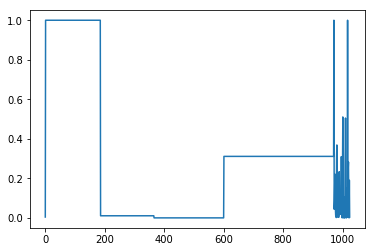

In [574]:
plt.plot(cond_vals)

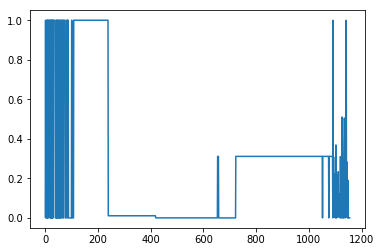

In [573]:
plt.plot(models_with_channel_df[channel_type].values)

In [575]:
channel_tags_df

,Model_ID,Model_Name,Filename
0,NMLCH000001,Ih Hyperpolarization Activated Cation,hd.nml
1,NMLCH000002,IA A Type Potassium Channel for Distal Dendrites,kad.nml
2,NMLCH000003,IA A Type Potassium,kap.nml
3,NMLCH000004,KDr Delayed Rectifier Potassium,kdr.nml
4,NMLCH000005,Na Sodium,na3.nml
5,NMLCH000006,NaX Sodium Channel for Axon,nax.nml
6,NMLCH000007,Passive Leak,pas.channel.nml
7,NMLCH000008,NaF Inactivating Fast Sodium,Gran_NaF_98.channel.nml
8,NMLCH000009,KDr Delayed Rectifier Potassium,Gran_KDr_98.channel.nml
9,NMLCH000010,KCa Calcium Dependent Potassium,Gran_KCa_98.channel.nml


In [576]:
# save clustered samples
filename = join(path2data,'clustered_ephys_samples.csv')
cortical_ephys_df = pd.read_csv(filename,index_col=0)

# save clustered raw samples
filename = join(path2data,'clustered_ephys_no_trans_samples.csv')
cortical_ephys_no_trans_df = pd.read_csv(filename,index_col=0)

In [577]:
cortical_ephys_df.sort_index(ascending=True,inplace=True) # make models ascend just in case
cortical_ephys_no_trans_df.sort_index(ascending=True,inplace=True)
models_with_channel_df.sort_index(ascending=True,inplace=True)


Overlaying channel density...


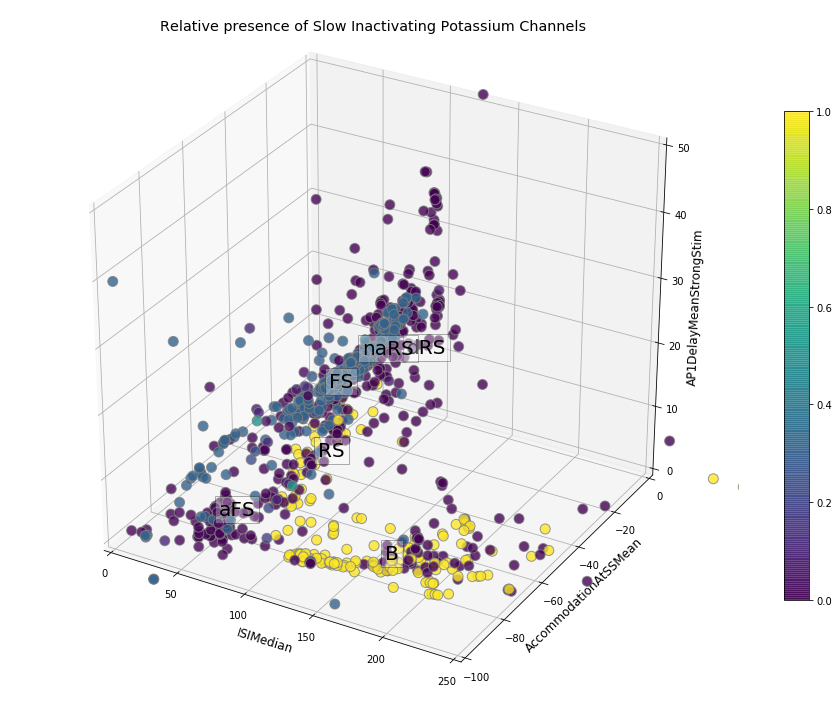

In [637]:
fig, ax = plot_ephys_clusters(samples_df=cortical_ephys_df,
                    raw_samples_df=cortical_ephys_no_trans_df,
                    plot_channels=True, channel_type = channel_type, cond_dens_df=models_with_channel_df,
                    display_props = ["ISIMedian","AccommodationAtSSMean","AP1DelayMeanStrongStim"],
                    x_lim=[0,250],y_lim=[-100,0],z_lim=[0,50],
                    figsize = (13,10));


figname = join(path2figs,'cortical_clustering_Kslow_v1.png')
plt.savefig(figname,dpi=150,
                bbox_inches='tight')



Overlaying channel density...


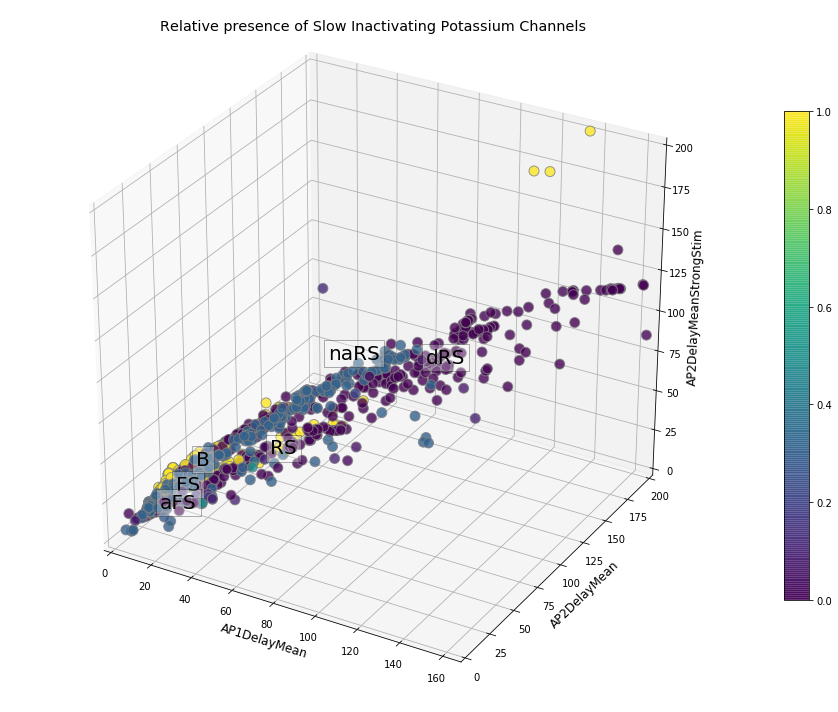

In [638]:
# Just properties with high loading with PC 1
plot_ephys_clusters(samples_df=cortical_ephys_df,
                    raw_samples_df=cortical_ephys_no_trans_df,
                    plot_channels=True, channel_type = channel_type, cond_dens_df=models_with_channel_df,
                    display_props = ['AP1DelayMean',"AP2DelayMean","AP2DelayMeanStrongStim"],
                    x_lim=[0,165],y_lim=[0,200],z_lim=[0,200],
                    figsize = (13,10));

figname = join(path2figs,'cortical_clustering_Kslow_v2.png')
plt.savefig(figname,dpi=150,
                bbox_inches='tight')

Overlaying channel density...


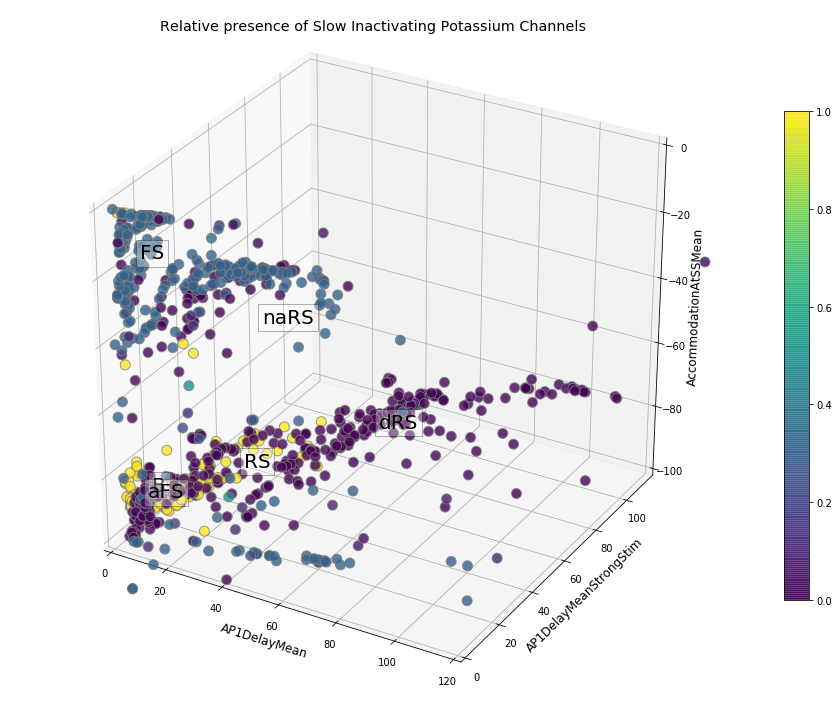

In [639]:
plot_ephys_clusters(samples_df=cortical_ephys_df,
                    raw_samples_df=cortical_ephys_no_trans_df,
                    plot_channels=True, channel_type = channel_type, cond_dens_df=models_with_channel_df,
                    display_props = ['AP1DelayMean',"AP1DelayMeanStrongStim","AccommodationAtSSMean"],
                    x_lim=[0,120],y_lim=[0,115],z_lim=[-100,0],
                    figsize = (13,10));

figname = join(path2figs,'cortical_clustering_Kslow_v3.png')
plt.savefig(figname,dpi=150,
                bbox_inches='tight')


Overlaying channel density...


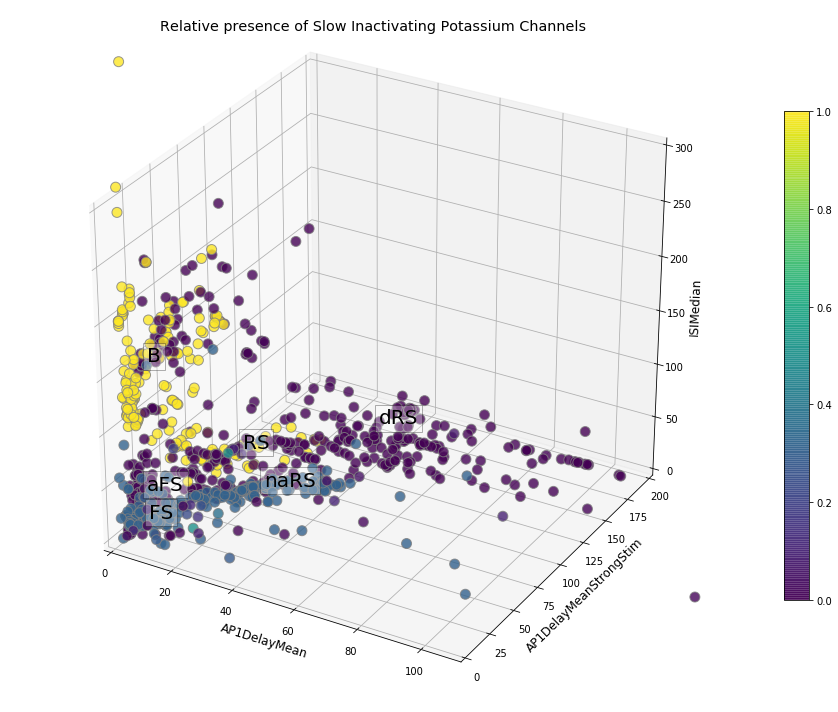

In [640]:
plot_ephys_clusters(samples_df=cortical_ephys_df,
                    raw_samples_df=cortical_ephys_no_trans_df,
                    plot_channels=True, channel_type = channel_type, cond_dens_df=models_with_channel_df,
                    display_props = ['AP1DelayMean',"AP1DelayMeanStrongStim","ISIMedian"],
                    x_lim=[0,110],y_lim=[0,200],z_lim=[0,300],
                    figsize = (13,10));

figname = join(path2figs,'cortical_clustering_Kslow_v4.png')
plt.savefig(figname,dpi=150,
                bbox_inches='tight')

Overlaying channel density...


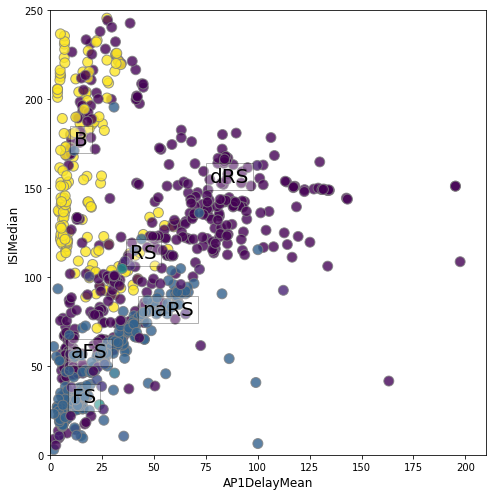

In [652]:
plot_ephys_clusters(samples_df=cortical_ephys_df,
                    raw_samples_df=cortical_ephys_no_trans_df,
                    plot_channels=True, channel_type = channel_type, cond_dens_df=models_with_channel_df,
                    display_props = ['AP1DelayMean',"ISIMedian"],
                    x_lim=[0,210],y_lim=[0,250],
                    figsize=(7,7),
                    plot_3d=False,show_colorbar=False);


figname = join(path2figs,'cortical_clustering_Kslow_v5.png')
plt.savefig(figname,dpi=150,
                bbox_inches='tight')

Overlaying channel density...


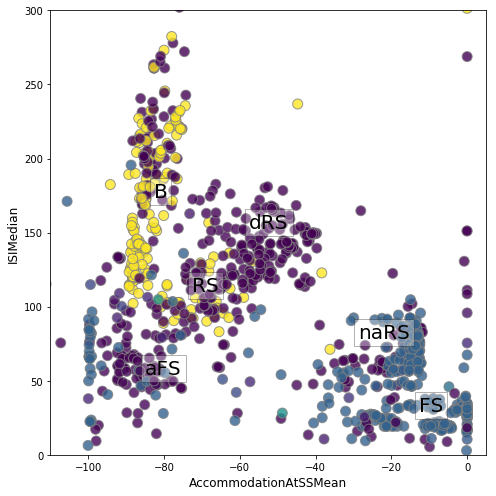

In [653]:
plot_ephys_clusters(samples_df=cortical_ephys_df,
                    raw_samples_df=cortical_ephys_no_trans_df,
                    plot_channels=True, channel_type = channel_type, cond_dens_df=models_with_channel_df,
                    display_props = ["AccommodationAtSSMean","ISIMedian"],
                    x_lim=[-110,5],y_lim=[0,300],
                    figsize=(7,7),
                    plot_3d=False,show_colorbar=False);


figname = join(path2figs,'cortical_clustering_Kslow_v6.png')
plt.savefig(figname,dpi=150,
                bbox_inches='tight')

Overlaying channel density...


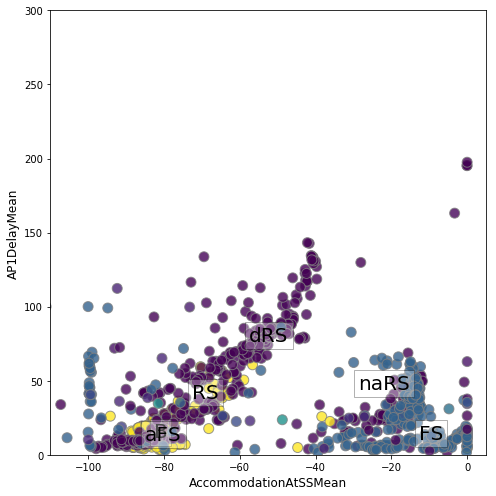

In [654]:
plot_ephys_clusters(samples_df=cortical_ephys_df,
                    raw_samples_df=cortical_ephys_no_trans_df,
                    plot_channels=True, channel_type = channel_type, cond_dens_df=models_with_channel_df,
                    display_props = ["AccommodationAtSSMean",'AP1DelayMean'],
                    x_lim=[-110,5],y_lim=[0,300],
                    figsize=(7,7),
                    plot_3d=False,show_colorbar=False);


figname = join(path2figs,'cortical_clustering_Kslow_v7.png')
plt.savefig(figname,dpi=150,
                bbox_inches='tight')

# Functions

In [649]:
def plot_ephys_clusters(samples_df,raw_samples_df,
                        display_props = ['AP1DelayMean','AP2DelayMean','AP2DelayMeanStrongStim'],
                        cluster_path = '/1/1/',
                        cluster_captions=['FS','dRS','B','naRS','RS','aFS'],
                        figsize = (12,10),x_lim=None,y_lim=None,z_lim=None,
                        plot_3d=True,save_fig=False,show_colorbar=False,
                        plot_channels=False,channel_type=None,cond_dens_df=None):
    '''
        Plots clustering results for desired properties. Used in poster.

    '''
    
    # get desired clusters
    source_df = samples_df[samples_df["ClusterPath"].str.startswith(cluster_path)]
    clusters = source_df["Cluster"]
    source_df = raw_samples_df.loc[source_df.index]
    
    desired_models = source_df.index.tolist()
    
    xs = source_df[display_props[0]]
    ys = source_df[display_props[1]]
    
    if len(display_props)>2:
        zs = source_df[display_props[2]]
        
    
    if plot_3d:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')
        
        if not plot_channels:
            cmap = 'rainbow'
            c = clusters
        else:
            print('Overlaying channel density...')
            cmap = 'viridis'
            reduced_cond_dens_df = cond_dens_df[cond_dens_df['Model_ID'].isin(desired_models)]
            cond_dens_vals = reduced_cond_dens_df[channel_type].values
            c = cond_dens_vals
    
        
        sc = ax.scatter(
                xs, ys, zs, 
                depthshade=False,
                marker='o', 
                c=c,
                edgecolors='gray',
                cmap=cmap,
                s=100,
                alpha=0.8)
        
        # clean z-axis
        if not z_lim is None:
            ax.set_zlim(z_lim)
            
        ax.set_zlabel(display_props[2],size='large')
        
        
    else:
        fig, ax = plt.subplots(1,1,figsize=figsize)
        
        if not plot_channels:
            cmap = 'rainbow'
            c = clusters
        else:
            print('Overlaying channel density...')
            cmap = 'viridis'
            reduced_cond_dens_df = cond_dens_df[cond_dens_df['Model_ID'].isin(desired_models)]
            cond_dens_vals = reduced_cond_dens_df[channel_type].values
            c = cond_dens_vals
        
        
        
        sc = ax.scatter(
                xs, ys,
                marker='o', 
                c=c,
                edgecolors='gray',
                cmap=cmap,
                s=100,
                alpha=0.8)

    
    # clean axes
    ax.set_xlabel(display_props[0],size='large')
    ax.set_ylabel(display_props[1],size='large')

    if not x_lim is None:
            ax.set_xlim(x_lim)
    if not y_lim is None:
            ax.set_ylim(y_lim)
            
    if plot_channels and show_colorbar:
#         divider = make_axes_locatable(ax)
#         cax = divider.append_axes('right', size="5%", pad=0.05)
#         fig.colorbar(sc,cax=cax)
#         plt.tight_layout(h_pad=1)
        fig.colorbar(sc,shrink=0.7)
        ax.set_aspect('auto')
        plt.tight_layout()
        
    else:
        plt.tight_layout()
            

    
    # add cluster assignment labels
    labels = np.unique(clusters)

    for i, l in enumerate(labels):
        X_label = source_df[clusters == l]
        center = [np.mean(X_label[prop]) for prop in display_props]
        if plot_3d:
            ax.text(center[0],center[1],center[2],cluster_captions[i],size=20, bbox=dict(facecolor='white', alpha=0.3))
        else:
            ax.text(center[0],center[1],cluster_captions[i],size=20, bbox=dict(facecolor='white', alpha=0.3))
    
        
     
    
    return fig, ax




